In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./Data/financial_anomaly_data.csv')
df

,Timestamp,TransactionID,AccountID,Amount,Merchant,TransactionType,Location
0,01-01-2023 08:00,TXN1127,ACC4,95071.92,MerchantH,Purchase,Tokyo
1,01-01-2023 08:01,TXN1639,ACC10,15607.89,MerchantH,Purchase,London
2,01-01-2023 08:02,TXN872,ACC8,65092.34,MerchantE,Withdrawal,London
3,01-01-2023 08:03,TXN1438,ACC6,87.87,MerchantE,Purchase,London
4,01-01-2023 08:04,TXN1338,ACC6,716.56,MerchantI,Purchase,Los Angeles
...,...,...,...,...,...,...,...
217436,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217437,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217438,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217439,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_cleaned = df.dropna()
df_cleaned

,Timestamp,TransactionID,AccountID,Amount,Merchant,TransactionType,Location
0,01-01-2023 08:00,TXN1127,ACC4,95071.92,MerchantH,Purchase,Tokyo
1,01-01-2023 08:01,TXN1639,ACC10,15607.89,MerchantH,Purchase,London
2,01-01-2023 08:02,TXN872,ACC8,65092.34,MerchantE,Withdrawal,London
3,01-01-2023 08:03,TXN1438,ACC6,87.87,MerchantE,Purchase,London
4,01-01-2023 08:04,TXN1338,ACC6,716.56,MerchantI,Purchase,Los Angeles
...,...,...,...,...,...,...,...
216955,31-05-2023 23:55,TXN1286,ACC6,62536.88,MerchantA,Withdrawal,San Francisco
216956,31-05-2023 23:56,TXN1015,ACC5,68629.69,MerchantG,Transfer,London
216957,31-05-2023 23:57,TXN1979,ACC15,8203.57,MerchantF,Purchase,London
216958,31-05-2023 23:58,TXN1845,ACC14,77800.36,MerchantF,Purchase,New York


In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, FunctionTransformer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [8]:
def date_time_splitter(df: pd.DataFrame):
  df = df.copy()
  df['Timestamp'] = pd.to_datetime(
      df['Timestamp'], format='%d-%m-%Y %H:%M')  # Parse timestamp format

  df.loc[:, 'Day'] = df['Timestamp'].dt.day
  df.loc[:, 'Month'] = df['Timestamp'].dt.month
  df.loc[:, 'Year'] = df['Timestamp'].dt.year
  df.loc[:, 'Hour'] = df['Timestamp'].dt.hour
  df.loc[:, 'Minute'] = df['Timestamp'].dt.minute

  return df

In [12]:
def label_encoding(df):
  le = LabelEncoder()
  for col in df.columns:
    df[col] = le.fit_transform(df[col])
  return df

In [6]:
categorical_cols = ['TransactionID', 'AccountID',
                    'Merchant', 'TransactionType', 'Location']

numerical_cols = ['Amount']

time_cols = [
    'Timestamp',
    'Day',
    'Month',
    'Year',
    'Hour',
    'Minute',
]

In [14]:
column_transformer = ColumnTransformer(
    transformers=[
        ('label_encoding', FunctionTransformer(
            label_encoding), categorical_cols),
        ('min_max_scaling', MinMaxScaler(), numerical_cols),
        ('date_time_splitter', FunctionTransformer(
            date_time_splitter), ['Timestamp']),
    ], remainder='passthrough'
)

pipeline = Pipeline([
    ('column_transformer', column_transformer)
])

data = pipeline.fit_transform(df_cleaned)

df_transformed = pd.DataFrame(
    data, columns=categorical_cols + numerical_cols + time_cols)
df_transformed

,TransactionID,AccountID,Merchant,TransactionType,Location,Amount,Timestamp,Day,Month,Year,Hour,Minute
0,143,9,7,0,4,0.097107,2023-01-01 08:00:00,1,1,2023,8,0
1,711,1,7,0,0,0.015933,2023-01-01 08:01:00,1,1,2023,8,1
2,1858,13,4,2,0,0.066482,2023-01-01 08:02:00,1,1,2023,8,2
3,488,11,4,0,0,0.000079,2023-01-01 08:03:00,1,1,2023,8,3
4,377,11,8,0,1,0.000721,2023-01-01 08:04:00,1,1,2023,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...
216955,319,11,0,2,3,0.063872,2023-05-31 23:55:00,31,5,2023,23,55
216956,19,10,6,1,0,0.070096,2023-05-31 23:56:00,31,5,2023,23,56
216957,1088,6,5,0,0,0.008369,2023-05-31 23:57:00,31,5,2023,23,57
216958,940,5,5,0,2,0.079464,2023-05-31 23:58:00,31,5,2023,23,58


In [24]:
df = df_transformed.loc[:, :'Amount']
df

,TransactionID,AccountID,Merchant,TransactionType,Location,Amount
0,143,9,7,0,4,0.097107
1,711,1,7,0,0,0.015933
2,1858,13,4,2,0,0.066482
3,488,11,4,0,0,0.000079
4,377,11,8,0,1,0.000721
...,...,...,...,...,...,...
216955,319,11,0,2,3,0.063872
216956,19,10,6,1,0,0.070096
216957,1088,6,5,0,0,0.008369
216958,940,5,5,0,2,0.079464


In [44]:
df['Amount']
df[['Amount']]

0         0.097107
1         0.015933
2         0.066482
3         0.000079
4         0.000721
            ...   
216955    0.063872
216956    0.070096
216957    0.008369
216958    0.079464
216959    0.066393
Name: Amount, Length: 216960, dtype: object

,Amount
0,0.097107
1,0.015933
2,0.066482
3,0.000079
4,0.000721
...,...
216955,0.063872
216956,0.070096
216957,0.008369
216958,0.079464


In [25]:
from sklearn.ensemble import IsolationForest

https://cs.nju.edu.cn/zhouzh/zhouzh.files/publication/icdm08b.pdf

https://en.wikipedia.org/wiki/Isolation_forest

https://www.linkedin.com/blog/engineering/data-management/isolation-forest

https://www.analyticsvidhya.com/blog/2021/07/anomaly-detection-using-isolation-forest-a-complete-guide/

In [67]:
X = df[['Amount']]

In [70]:
random_state = np.random.RandomState(42)
model = IsolationForest(n_estimators=100, max_samples='auto',
                        contamination=float(0.001), random_state=random_state)

In [71]:
model.fit(X)

IsolationForest(contamination=0.001,
                random_state=RandomState(MT19937) at 0x1EB14D85940)

In [72]:
df['scores'] = model.decision_function(X)
df['anomaly_score'] = model.predict(X)

abnormal_df = df[df['anomaly_score'] == -1]
abnormal_df.shape

(14, 8)

In [73]:
abnormal_indexes = abnormal_df.index
abnormal_indexes

Index([  2775,   3448,   3453,   4148,   4194,  45099,  45100,  45108, 211714,
       211753, 211866, 211959, 212513, 213460],
      dtype='int64')

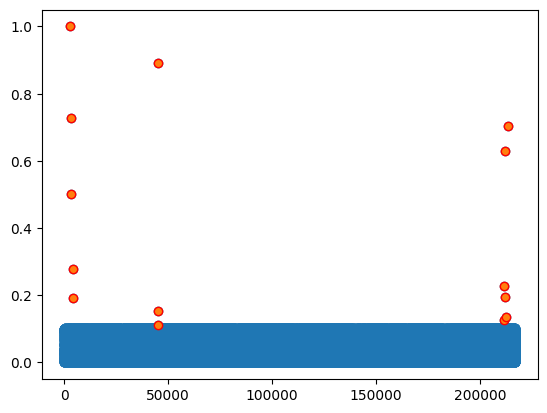

In [74]:
_ = plt.scatter(range(len(df)), df.loc[:, 'Amount'])
_ = plt.scatter(abnormal_indexes,
                df.loc[abnormal_indexes, 'Amount'], edgecolors="r")